# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney
kenny,Make some noise for Kenny Sebastian. Oh my God...,Kenny Sebastian
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.
mike,"Wow. Hey, thank you. Thanks. Thank you, guys. ...",Mike Birbiglia


In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

# Apply a function along an axis of the DataFrame.
data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.070450,0.481201
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.057509,0.557038
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.016336,0.536688
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.002607,0.512731
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.045138,0.522287
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.040348,0.546085
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney,0.082830,0.482040
kenny,Make some noise for Kenny Sebastian. Oh my God...,Kenny Sebastian,0.135102,0.572056
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.,0.057794,0.514377
mike,"Wow. Hey, thank you. Thanks. Thank you, guys. ...",Mike Birbiglia,0.093610,0.517119


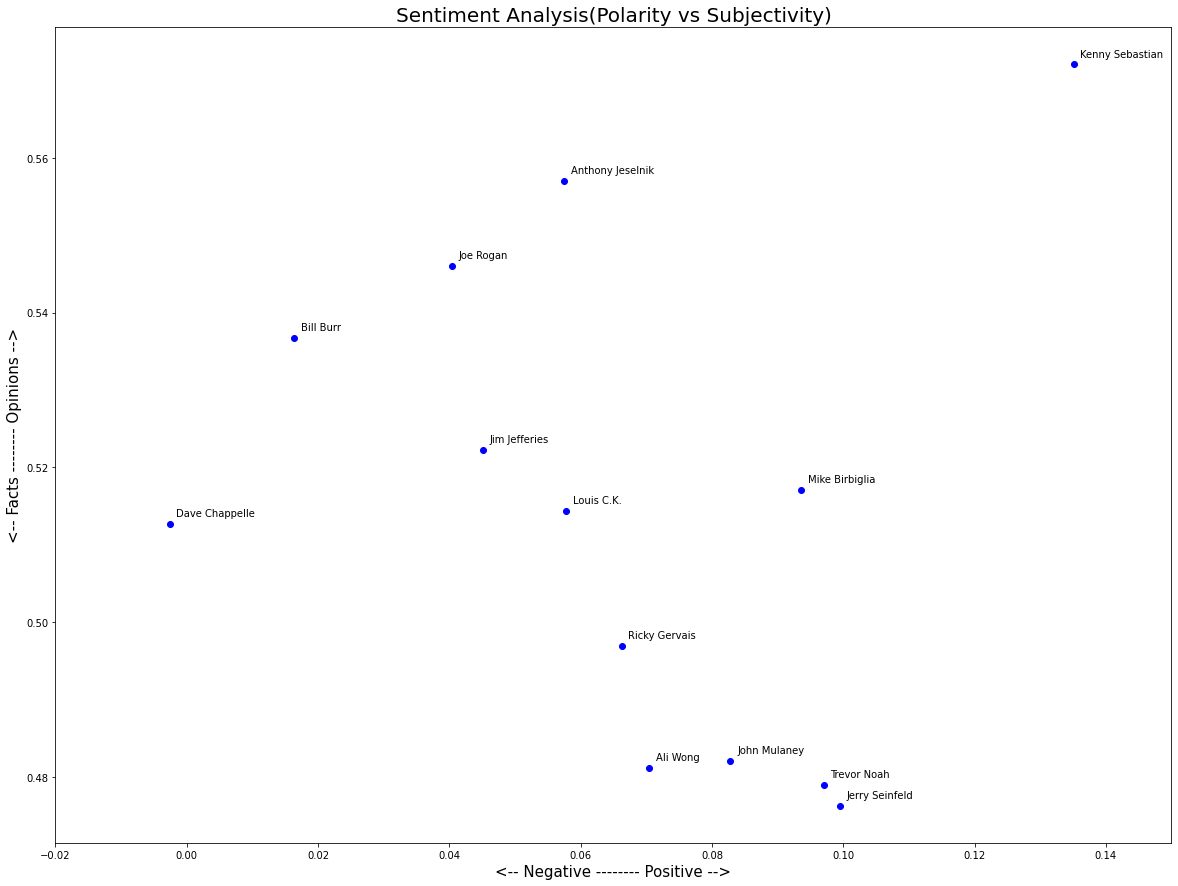

In [6]:
# Create a simple scatter plot of Polarity and Subjectivity
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 15] # Set width to 10 inches and height to 8 inches

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10) # Offset the label to avoid overlap of label & dot
    plt.xlim(-.02, .15) 

plt.title('Sentiment Analysis(Polarity vs Subjectivity)', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [31]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=15):
    '''Takes in a string of text and splits into n equal parts, with a default of 15 equal parts.'''

    length = len(text) # Calculate length of text
    size = math.ceil(length / n) # Calculate size of each chunk of text 
    # Calculate the starting points of each chunk of text
    start = np.arange(0, length, size) # numpy.arange([start, ]stop, [step]) ...Return evenly spaced values within a given interval.
    
    # Pull out equally sized pieces of text and put it into a list. Return a list with chunks of text
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [32]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.070450,0.481201
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.057509,0.557038
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.016336,0.536688
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.002607,0.512731
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.045138,0.522287
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.040348,0.546085
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney,0.082830,0.482040
kenny,Make some noise for Kenny Sebastian. Oh my God...,Kenny Sebastian,0.135102,0.572056
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.,0.057794,0.514377
mike,"Wow. Hey, thank you. Thanks. Thank you, guys. ...",Mike Birbiglia,0.093610,0.517119


In [33]:
# Let's create a list of lists that'll hold all of the pieces of text of all the comedians
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

In [34]:
list_pieces

[['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they just go t

In [35]:
# The list has 12 items, one for each transcript
len(list_pieces)

13

In [36]:
# And then each transcript has been split into 10 pieces of text
len(list_pieces[0])

15

In [37]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.1449873353596758,
  0.04516666666666667,
  0.05713872354497354,
  0.08723845598845599,
  0.08997977543290045,
  0.08615466511807975,
  0.01619047619047618,
  -0.01199892511117001,
  0.17517985177025358,
  0.053211635303472046,
  0.05573671497584542,
  0.11026785714285715,
  -0.011726451545530486,
  0.03939153439153439,
  0.12386862546437014],
 [0.28201356421356416,
  -0.046252705627705636,
  -0.125987012987013,
  -0.06678727046374107,
  0.09471153846153853,
  0.01013488543976349,
  0.18787838704505372,
  0.06886337868480726,
  0.1712886904761905,
  -0.008214285714285716,
  0.12455665024630544,
  0.002406554019457208,
  -0.013328664799253036,
  0.04604256854256852,
  0.17064450306637804],
 [0.004025597122612046,
  -0.07601887601887607,
  0.048151718073593044,
  0.040339454452357655,
  0.00630837818337818,
  0.03593344155844154,
  -0.003704105948824263,
  -0.02795857279693486,
  0.08578414934048736,
  0.024820820076844174,
  -0.03925895467836258,
  0.014197686116700187,
  -0.03491558

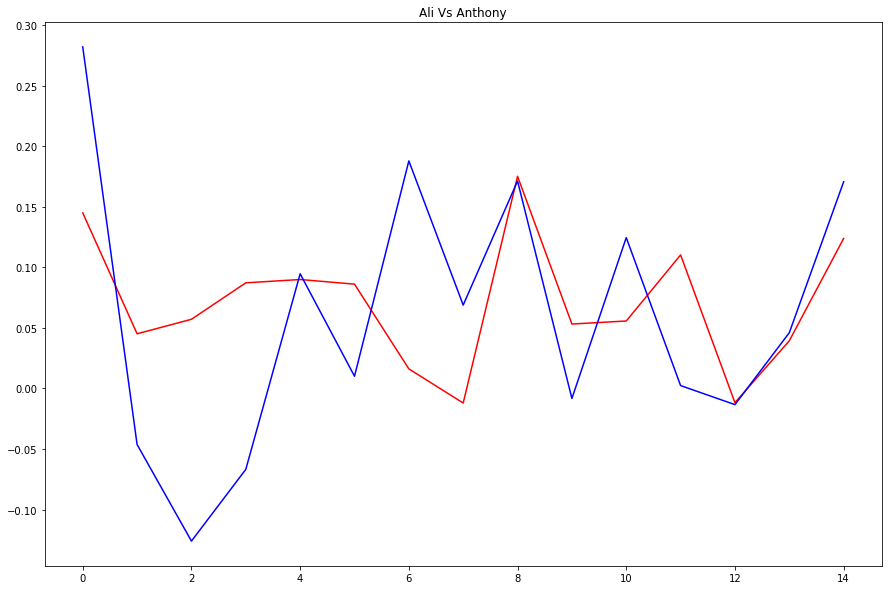

In [38]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0],color='red')
plt.title("Ali Vs Anthony")
# plt.show()
plt.plot(polarity_transcript[1],color='b')
# plt.title(data['full_name'].index[1])
plt.show()

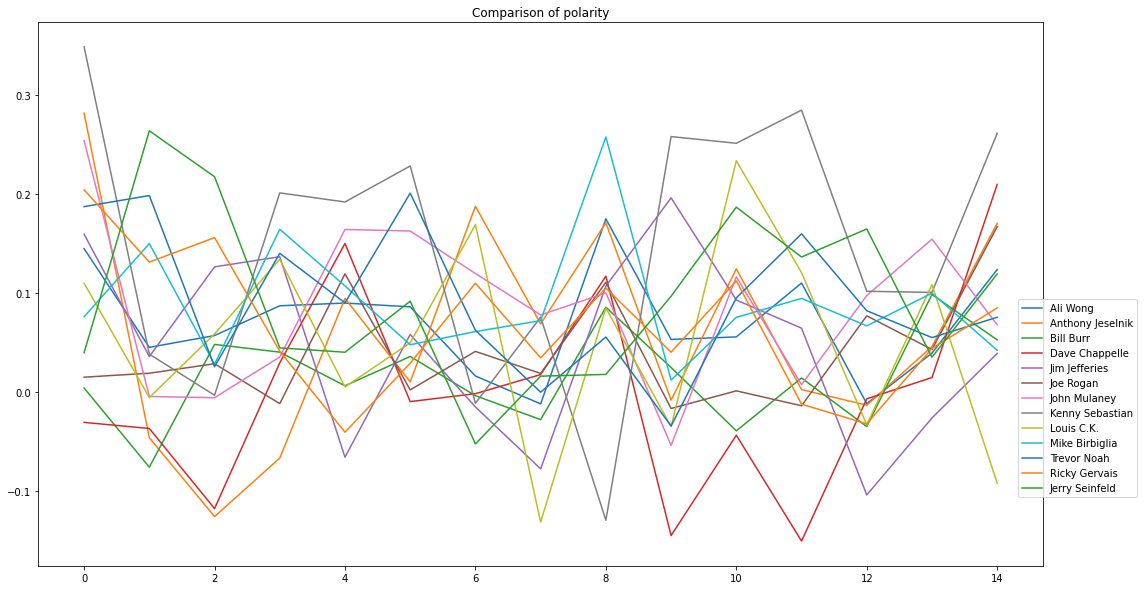

In [39]:
# Show the plot for one comedian
plt.rcParams['figure.figsize'] = [18, 10]
for i in polarity_transcript:
    plt.plot(i)
# plt.plot(polarity_transcript[0])
plt.title("Comparison of polarity")
# plt.legend()
plt.legend(data["full_name"],bbox_to_anchor =(0.97, 0.5))
# plt.show()

# plt.plot(polarity_transcript[1])
# plt.title(data['full_name'].index[1])
plt.show()

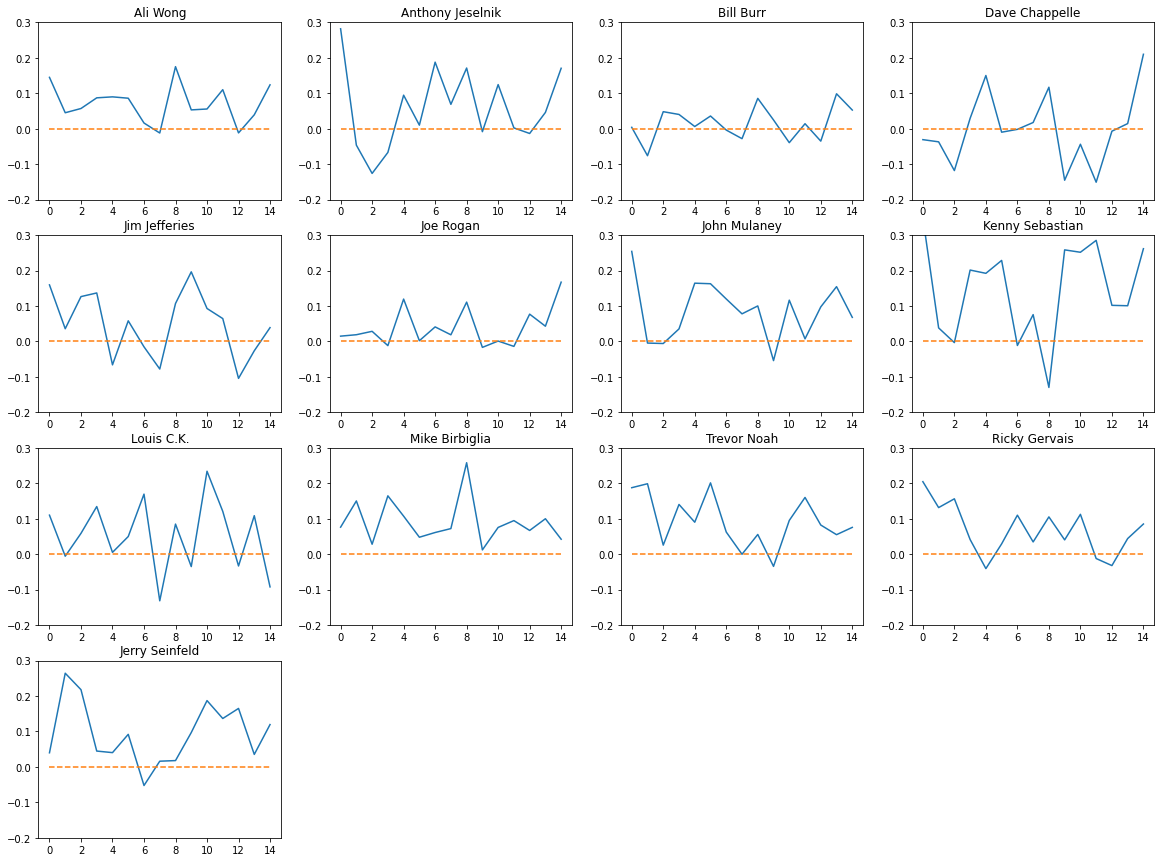

In [40]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [20, 15]

for index, comedian in enumerate(data.index):    
    plt.subplot(4, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,15), np.zeros(15), linestyle='--')
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

In [41]:
subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for p in lp:
        subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)
    
subjectivity_transcript

[[0.618338399189463,
  0.4380952380952381,
  0.43099371693121685,
  0.3484758297258298,
  0.4052594696969697,
  0.534649632210608,
  0.47825396825396843,
  0.45491459787378147,
  0.5115702947845804,
  0.5204567541302234,
  0.4319142512077294,
  0.6178943452380953,
  0.5037468671679197,
  0.5097476597476598,
  0.44900371496116187],
 [0.5422063492063492,
  0.6256696428571428,
  0.5981742424242423,
  0.6421724245253657,
  0.5570512820512821,
  0.5894740083764474,
  0.5053924162257496,
  0.48721655328798186,
  0.5452678571428572,
  0.44399159663865545,
  0.6072091701402045,
  0.7246159754224272,
  0.513877217553688,
  0.5102940115440114,
  0.44515636273448767],
 [0.6504898128405587,
  0.491672029172029,
  0.44368151379870124,
  0.5884885723595402,
  0.509550622050622,
  0.609004329004329,
  0.4959364774505618,
  0.6127791461412148,
  0.5103733512184215,
  0.530118091413272,
  0.5514437134502925,
  0.5246981891348087,
  0.5206955266955268,
  0.5233006535947712,
  0.5166538658474142],
 [0.52

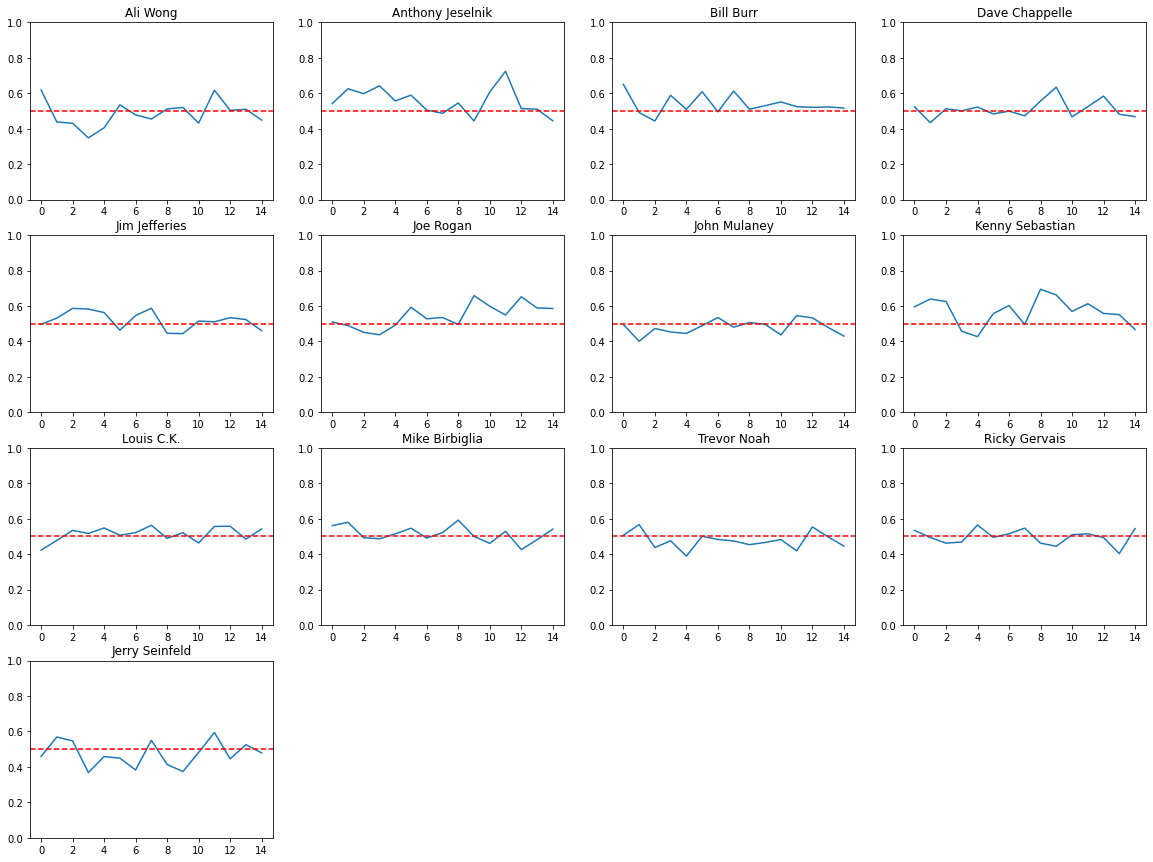

In [42]:
plt.rcParams['figure.figsize'] = [20, 15]

for index, comedian in enumerate(data.index):    
    plt.subplot(4, 4, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.axhline(y = 0.5, color = 'r', linestyle = '--')
    plt.title(data['full_name'][index])
    plt.ylim(ymin=0, ymax=1)
    
plt.show()

## Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


### 1. Classifying comedians on the basis of polarity and subjectivity

#### polarity
Ali Wong stays generally positive throughout her routine. Similar comedians are Louis C.K. and Mike Birbiglia.

On the other hand, you have some pretty different patterns here like Joe Rogan who gets happier as time passes and Dave Chappelle who has some pretty down moments in his routine.<br>
Comedians like Trevor Noah, Jerry SeinFeld, Ricky Gervais ang Kenny stay happy most time but for a very few part of their set, they seem a little down and unhappy.<br>

Anthony Jeselnik begins his set on a low note and then as the time progresses he starts getting positive and then he barely gets any negative thoughts.<br><br>

#### subjectivity
Kenny Sebastian is the only coedian whose set majorly based on his opinions.<br>
Anthony Jeselnik is a little like kenny and uses only a few jokes that are based on his opinions.<br>
All other comedians except jerry seinfeld have an equal mixture of facts and their opinions in jokes.<br>
Jerry Seinfeld uses facts a lot to create laughter.<br>
Trevor Noah also uses facts a lot.<br>
Joe Rogan starts his set with facts and than starts making his own opinions later on.

### 2. Changing numbr of sections to 30 and noting the subjectivity of the comedians

In [43]:
list_pieces = []
for t in data.transcript:
    split = split_text(t, n=30)
    list_pieces.append(split)

In [44]:
print(len(list_pieces))
len(list_pieces[0])

13


30

In [45]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.18814980158730157,
  0.09994824016563146,
  -0.017307692307692316,
  0.08208333333333334,
  -0.019683441558441556,
  0.12214209401709401,
  0.051111111111111114,
  0.13477443609022555,
  0.05638311688311688,
  0.14597420634920635,
  0.06662157287157287,
  0.1087719298245614,
  0.02239583333333331,
  0.010964912280701752,
  -0.09062111801242237,
  0.057551476301476306,
  0.21276913597470237,
  0.13941387559808613,
  0.010352564102564098,
  0.10554300771692077,
  0.006018518518518516,
  0.12638888888888888,
  0.15347985347985346,
  0.0807017543859649,
  0.06426807760141091,
  -0.08012152777777774,
  0.12386554621848737,
  -0.025883838383838377,
  0.07172961138478379,
  0.20787037037037037],
 [0.29319916194916196,
  0.2698958333333334,
  -0.07914746543778801,
  0.013731856378915204,
  -0.021678321678321698,
  -0.23898809523809525,
  0.01561791383219956,
  -0.1244708994708995,
  0.1855769230769231,
  0.0038461538461538837,
  0.021491228070175443,
  0.00032713498622589677,
  0.073842592

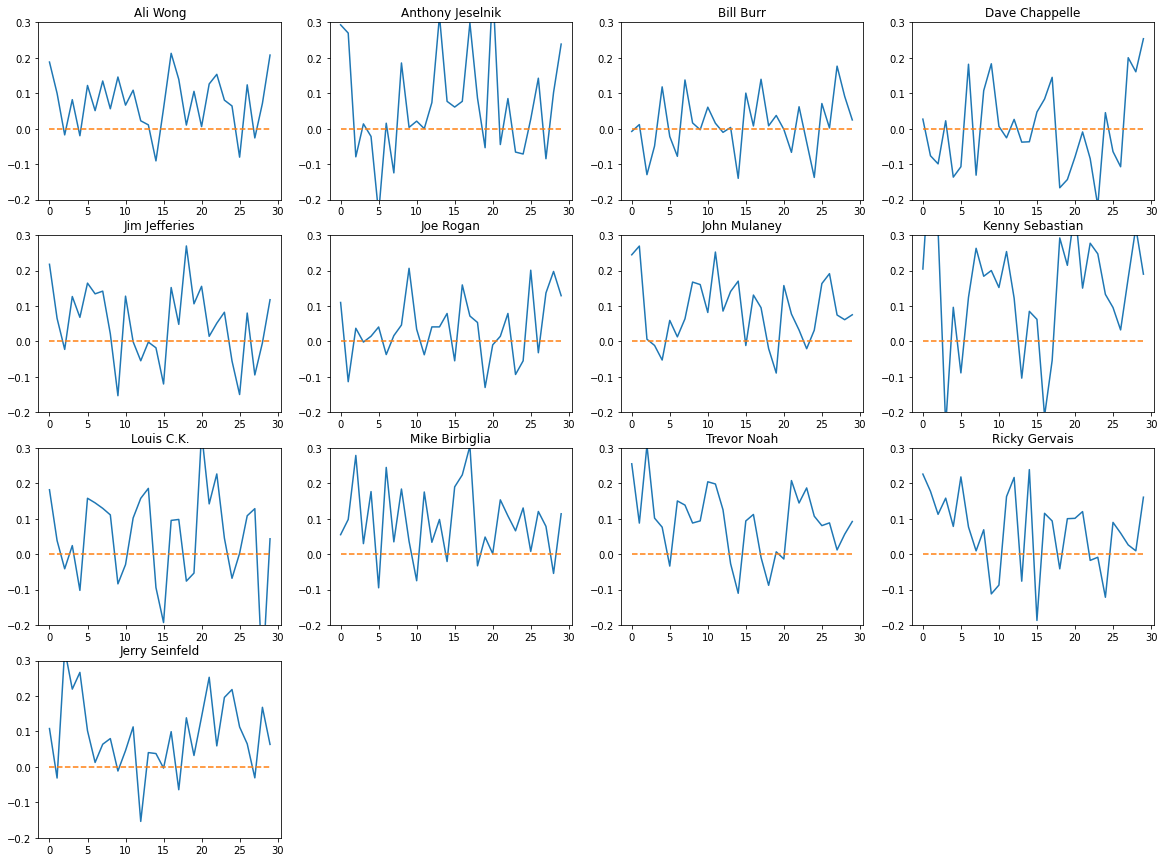

In [46]:
plt.rcParams['figure.figsize'] = [20, 15]

for index, comedian in enumerate(data.index):    
    plt.subplot(4, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,30), np.zeros(30), linestyle='--')
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

### Polarity Analysis
We cans see that polarity is more precised when we increased the split size.<br>
We notice that the comedians that seemed more positive in less splits seem to be a little negative in this precised graph.<br>
For example Mike was not at all negative in the previous analysis but here he seems to be negative or low at some parts.

In [47]:
subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for p in lp:
        subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)
    
subjectivity_transcript

[[0.6356150793650794,
  0.6003105590062112,
  0.4205128205128206,
  0.4484848484848485,
  0.33363095238095236,
  0.5133775946275947,
  0.28422222222222226,
  0.4330200501253132,
  0.429443722943723,
  0.364952380952381,
  0.5418470418470419,
  0.5263157894736842,
  0.4868055555555556,
  0.47105263157894744,
  0.4002484472049689,
  0.5032731157731157,
  0.5693080357142857,
  0.4629490392648287,
  0.5461538461538462,
  0.491407867494824,
  0.4016975308641975,
  0.47485380116959064,
  0.5876373626373627,
  0.6385964912280702,
  0.47760141093474423,
  0.5272777777777777,
  0.5050420168067227,
  0.5133838383838385,
  0.47010125889436233,
  0.41501322751322745],
 [0.5894993894993895,
  0.4909722222222222,
  0.6042754736303123,
  0.6646825396825398,
  0.6017773892773893,
  0.5942708333333334,
  0.6447845804988662,
  0.6403439153439154,
  0.5205128205128206,
  0.5935897435897436,
  0.6401315789473684,
  0.5457242883379247,
  0.46331018518518513,
  0.5534863945578232,
  0.41291666666666665,
  0

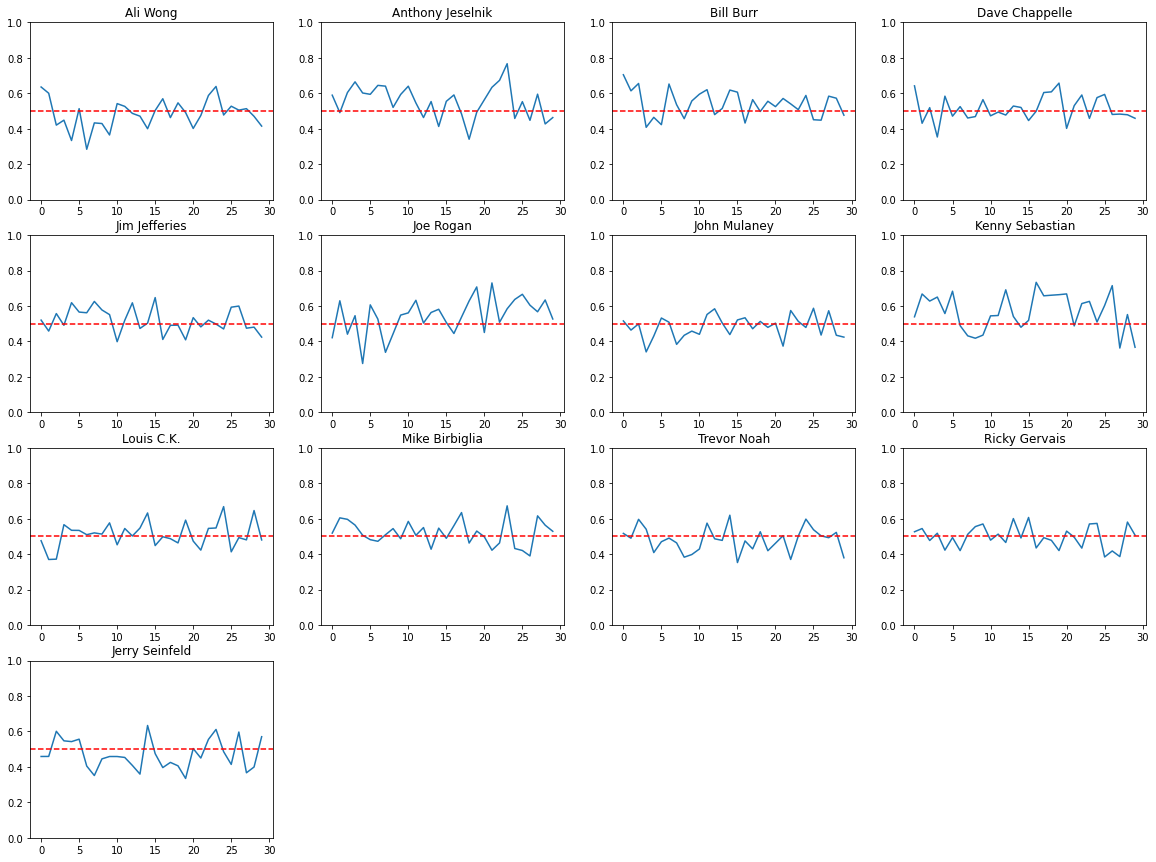

In [48]:
plt.rcParams['figure.figsize'] = [20, 15]

for index, comedian in enumerate(data.index):    
    plt.subplot(4, 4, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.axhline(y = 0.5, color = 'r', linestyle = '--')
    plt.title(data['full_name'][index])
    plt.ylim(ymin=0, ymax=1)
    
plt.show()

#### Analysing on the basis of Subjectivity

Kenny Sebastian is the only coedian whose set majorly based on his opinion.<br>
Anthony Jeselnik is a little like kenny and uses only a few jokes that are based on facts .<br>
All other comedians except jerry seinfeld have an equal mixture of facts and their opinions in jokes.<br>
Jerry Seinfeld uses a lot of facts to create laughter.<br>